# modelling

### import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from functions.model_data import myModel
from functions.postproccessing import proccess_feature_importances, proccess_f1_vs_sample_size

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
%matplotlib inline

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load variables stored by data_preproccessing notebook

In [2]:
%store -r train_data_formodel
%store -r test_data
%store -r my_data
%store -r uniques
%store -r best_feats
%store -r X_test_labeled_df
%store -r site_frequencies_df



### configurations
* save_plots -> True|False
* scale -> True|False if set to True then features scaled to all have mean value 0 and standard deviation 1

In [3]:
save_plots = True
scale = True

### counts of instances in all classes before oversampling

In [4]:
train_data_formodel['class'].value_counts()

4     105
17    100
18     61
0      53
10     47
13     45
15     36
16     36
2      36
12     30
11     30
8      30
7      30
5      30
6      27
9      27
1      24
14     21
3      18
Name: class, dtype: int64

### The class column is stored as the variable y and the variables identified as best by the 2 feature_selection notebook are used as features

In [5]:
y = np.array(train_data_formodel['class'])

if scale:
    my_scaler = StandardScaler()
    X = np.array(my_scaler.fit_transform(np.array(train_data_formodel[best_feats])))
else:
    X = np.array(np.array(train_data_formodel[best_feats]))

### the dimensions of the class and features are checked

In [6]:
print(X.shape)
print(y.shape)

(786, 15)
(786,)


### Carry out 10-f0ld stratified cross validation, class f1 scores and macro f1 scores are calculated

In [7]:
my_model = myModel(X, y)

In [8]:
my_model.evaluate_knn()

making model:
1
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predi

gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
2
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
3
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Using ba

gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
4
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Using ba

gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
5
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
6
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
7
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
8
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
9
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
10
running grid search on this training data fold
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.7s remaining:    1.0s


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished


In [9]:
f1_df = pd.DataFrame(data = my_model.f1_dict)


In [10]:
for key in my_model.f1_dict:
    print(len(my_model.f1_dict[key]))

19
19
19
19
19
19
19
19
19
19


### Below are the encodings for the class variable

In [11]:
print(train_data_formodel['class'].unique())
print(list(uniques))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
['FH', 'ER', 'WW', 'TC', 'CS', 'BC', 'KQ', 'AR', 'SL', 'FG', 'WB_BX', 'PF', 'BM', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']


In [12]:
f1_df_final = pd.concat([f1_df, pd.Series(uniques)], axis = 1)

In [13]:
f1_df_final.rename(columns={0:'class'}, inplace=True)
f1_df_final.set_index('class', drop = True, inplace = True)

### Boxplot showing the distribution of class f1 scores from 10 models

In [14]:
f1_df_final.to_csv('output_datasets/cross_validation_results.csv')

In [27]:
f1_df_final

,round1,round2,round3,round4,round5,round6,round7,round8,round9,round10
class,,,,,,,,,,
FH,0.800000,1.000000,0.923077,1.000000,0.888889,0.888889,0.800000,0.750000,1.000000,1.000000
ER,0.666667,0.666667,0.750000,0.857143,0.666667,0.500000,0.000000,0.571429,1.000000,1.000000
WW,0.666667,0.666667,0.857143,1.000000,0.666667,1.000000,0.666667,0.800000,1.000000,1.000000
TC,0.400000,0.571429,1.000000,0.500000,0.666667,1.000000,0.800000,0.800000,1.000000,0.666667
CS,0.900000,0.842105,0.857143,0.761905,0.857143,0.777778,0.900000,0.631579,0.666667,0.909091
BC,1.000000,0.857143,0.400000,0.800000,0.800000,0.500000,0.000000,0.400000,0.857143,0.400000
KQ,1.000000,0.857143,0.571429,0.857143,1.000000,0.333333,0.400000,0.500000,1.000000,0.400000
AR,0.857143,0.500000,0.666667,0.285714,0.400000,0.857143,0.666667,0.461538,0.000000,0.000000
SL,0.666667,1.000000,0.857143,0.000000,0.857143,0.857143,0.857143,0.571429,0.666667,0.800000


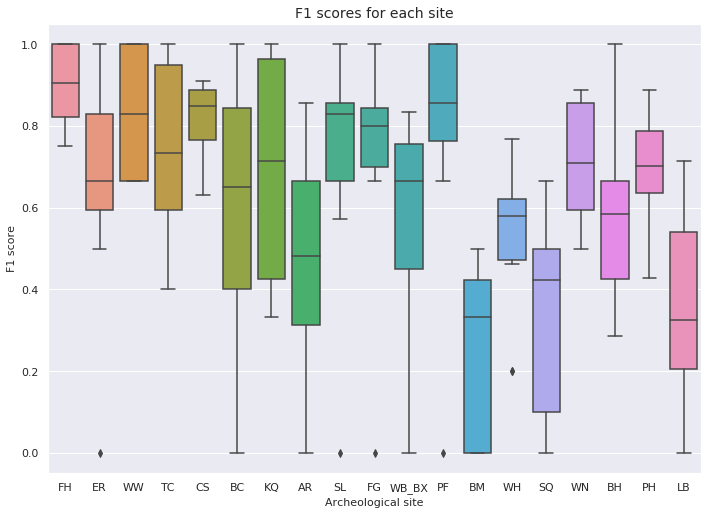

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(data = f1_df_final.T)
plot.set_title('F1 scores for each site', fontdict={'fontsize': 14})
plot.set_ylabel('F1 score', fontdict={'fontsize': 11})
plot.set_xlabel("Archeological site", fontdict={'fontsize': 11})

if save_plots:
    fig = plot.get_figure()
    fig.savefig('figures/site_specific_f1_scores.png')

In [16]:
if save_plots:
    pd.DataFrame(data = f1_df_final.T.median()).to_csv('figures/median_class_f1_scores.csv')

### Boxplot showing the macro F1 score

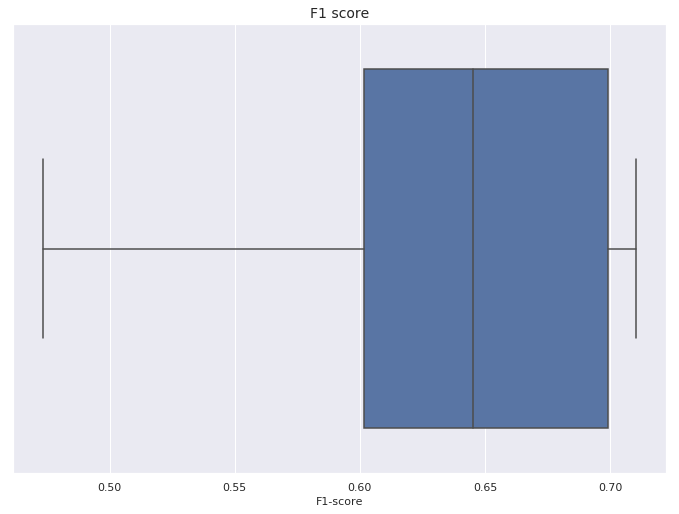

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(my_model.macro_f1_scores)
plot.set_title('F1 score', fontdict={'fontsize': 14})
plot.set_xlabel("F1-score", fontdict={'fontsize': 11})

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('figures/average-weighted f1_scores.png')

In [18]:
with open('output_datasets/macro_f1_scores', 'a') as f:
    for score in my_model.macro_f1_scores:
        f.write(str(score))
        f.write('\n')

In [19]:
if save_plots:
    pd.Series(pd.Series(my_model.macro_f1_scores).median()).to_csv('output_datasets//median_macro_f1.csv')

In [20]:
pd.Series(my_model.macro_f1_scores).median()

0.6450169290543252

### Boxplot showing accuracy scores

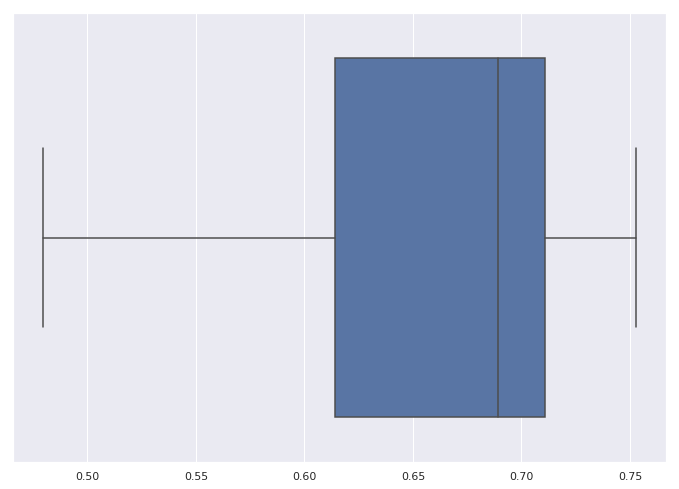

In [21]:
sns.boxplot(my_model.accuracy_scores)

### Get feature importances

In [22]:
if my_model.model_name == 'rfc':

    dataForPlot = proccess_feature_importances(my_data, my_model.feat_imp_dict, best_feats)


    sns.set_style("whitegrid")
    sns.set_style()
    sns.set(rc={'figure.figsize':(20,20)})
    plot = sns.boxplot(data = dataForPlot)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90, ha = 'left')
    plot.set_title('Feature (element) importance', fontdict={'fontsize': 20})
    plot.set_ylabel('Feature importance', fontdict={'fontsize': 15})
    plot.set_xlabel("Element", fontdict={'fontsize': 15})

    if save_plots:
        fig = plot.get_figure()
        fig.savefig('figures/feature_importances.png')

In [23]:
if my_model.model_name == 'rfc':
    dataForPlot.to_csv('output_datasets/feature_importances.csv')

In [24]:
forPlot = proccess_f1_vs_sample_size(site_frequencies_df, f1_df_final)

In [25]:
forPlot.to_csv('output_datasets/score_vs_sample_number.csv')

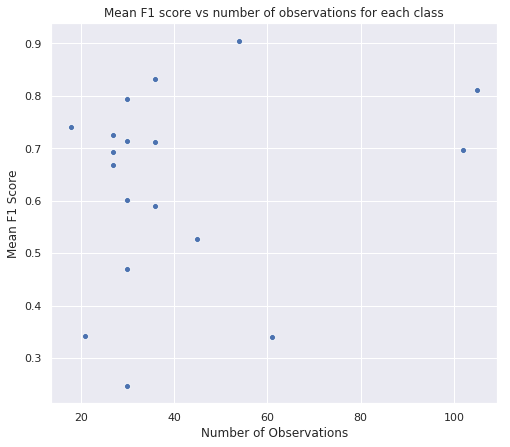

In [26]:
sns.set(rc={'figure.figsize':(8,7)})
plot = sns.scatterplot(x ='Number of Observations', y = 'Mean F1 Score', data = forPlot, ci=False)
ax = plt.gca()
ax.set_title("Mean F1 score vs number of observations for each class")
fig = plot.get_figure()
if save_plots:
    fig.savefig('figures/f1scoresvsnumberobservations{0}.png'.format(my_model.model_name))